In [13]:
## Cloud label comparison
import sage_data_client
import duckdb
import requests
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_lidar = sage_data_client.query(
    start="-192h", 
    filter={
        "plugin": "registry.sagecontinuum.org/rjackson/lidar_spectra:2024.12.4",
        "vsn": "W0C0"
    }
)
df_lidar = df_lidar.set_index("timestamp")

In [4]:
df_cloud = sage_data_client.query(
    start="-192h", 
    filter={
        "plugin": "registry.sagecontinuum.org/seonghapark/cloud-cover:0.1.3",
        "vsn": "W0BE"
    }
)
df_cloud = df_cloud.set_index("timestamp")

In [7]:
df_lidar

,name,value,meta.filename,meta.host,meta.node,meta.plugin,meta.task,meta.vsn,meta.zone
timestamp,,,,,,,,,
2024-12-04 23:15:59.642714624+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,caco.lidarspectra.z02.c1.20241204.203500.nc,000042a20d42a8b4.ws-nxcore,000042a20d42a8b4,registry.sagecontinuum.org/rjackson/lidar_spec...,lidarspectra,W0C0,core
2024-12-04 23:16:21.640388608+00:00,upload,https://storage.sagecontinuum.org/api/v1/data/...,caco.lidarspectra.z02.c1.20241204.205450.nc,000042a20d42a8b4.ws-nxcore,000042a20d42a8b4,registry.sagecontinuum.org/rjackson/lidar_spec...,lidarspectra,W0C0,core


In [11]:
username = 'rjackson'
password = '49GOS28FFE6I8REWMMD6'

    
def readtofile(uurl, ff, username, password):
    r = requests.get(uurl, auth=(username,password))
    if r.status_code == 200:
        print('Downloading %s' % uurl[-18:])
        with open(ff, 'wb') as out:
            for bits in r.iter_content():
                out.write(bits)
    
    return True

fname = df_lidar["value"][0]
out_file = fname.split("-")[-1]
readtofile(fname, out_file, username, password)

True

In [14]:
ds = xr.open_dataset('caco.lidarspectra.z02.c1.20241204.203500.nc')
ds

ERROR 1: dlopen(/Users/rjackson/mambaforge/envs/pydda_env/lib/gdalplugins/ogr_PG.dylib, 0x0001): Library not loaded: /usr/lib/libpq.5.dylib
  Referenced from: <850D7FC6-C261-3AD1-8078-F15EABFBBE97> /Users/rjackson/mambaforge/envs/pydda_env/lib/gdalplugins/ogr_PG.dylib
  Reason: tried: '/usr/lib/libpq.5.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/lib/libpq.5.dylib' (no such file), '/usr/lib/libpq.5.dylib' (no such file, not in dyld cache), '/usr/local/lib/libpq.5.dylib' (no such file)
ERROR 1: dlopen(/Users/rjackson/mambaforge/envs/pydda_env/lib/gdalplugins/ogr_PG.dylib, 0x0001): Library not loaded: /usr/lib/libpq.5.dylib
  Referenced from: <850D7FC6-C261-3AD1-8078-F15EABFBBE97> /Users/rjackson/mambaforge/envs/pydda_env/lib/gdalplugins/ogr_PG.dylib
  Reason: tried: '/usr/lib/libpq.5.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/lib/libpq.5.dylib' (no such file), '/usr/lib/libpq.5.dylib' (no such file, not in dyld cache), '/usr/local/lib/libpq.5.dy

<xarray.Dataset> Size: 99MB
Dimensions:                 (time: 120, freq: 1024, vel_bins: 1024, range: 200)
Coordinates:
  * time                    (time) datetime64[ns] 960B 2024-12-04T20:35:00 .....
  * vel_bins                (vel_bins) float64 8kB -19.35 -19.31 ... 19.27 19.31
  * range                   (range) int64 2kB 0 60 120 180 ... 11820 11880 11940
Dimensions without coordinates: freq
Data variables:
    aziumth                 (time) float32 480B ...
    elevation               (time) float32 480B ...
    freq_bins               (freq) float64 8kB ...
    power_spectral_density  (time, range, vel_bins) float32 98MB ...
    intensity               (time, range) float32 96kB ...
    doppler_velocity        (time, range) float64 192kB ...
    spectral_width          (time, range) float32 96kB ...
    skewness                (time, range) float32 96kB ...
    kurtosis                (time, range) float32 96kB ...
Attributes:
    nyquist_velocity:  19.350000 m s-1
    intensity_mask:    1.008000

In [28]:
str(ds["time"][-1].dt.strftime("%Y-%m-%dT%H:%M:%S").values)

'2024-12-04T20:54:50'

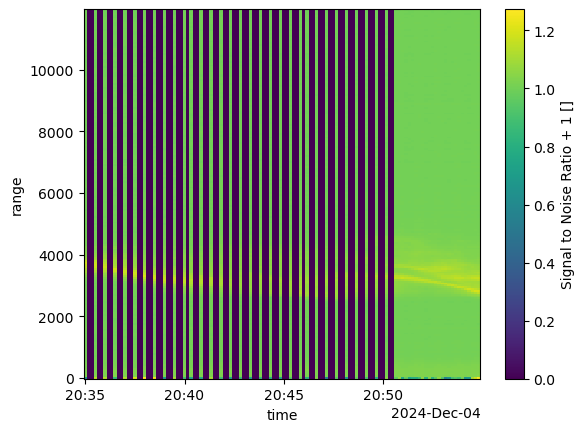

In [16]:
ds['intensity'].T.plot()

(-5.0, 5.0)

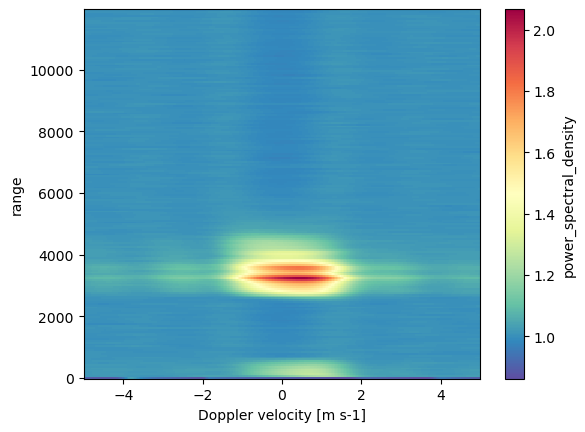

In [22]:
ds['power_spectral_density'].sel(
    time=slice('2024-12-04T20:50:00', '2024-12-04T21:00:00')).mean(dim='time').plot(cmap='Spectral_r')
plt.xlim([-5, 5])

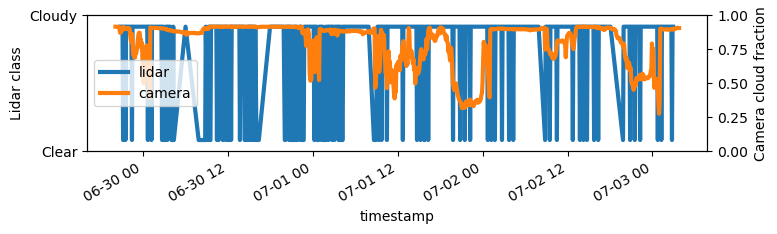

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2))
ax3 = ax.twinx()
df_lidar["value"][df_lidar["name"] == "weather.classifier.class"].plot(
    ax=ax, label="lidar", linewidth=3)
df_cloud["value"][df_cloud["name"] == "env.coverage.cloud"].plot(
    ax=ax, label="camera", linewidth=3)
ax.legend()
ax.set_ylabel("Lidar class")
ax.set_yticks([-0.1, 1.1])
ax.set_yticklabels(["Clear", "Cloudy"])
ax3.set_ylabel("Camera cloud fraction")
fig.savefig('Comparison.png')

<Axes: xlabel='timestamp'>

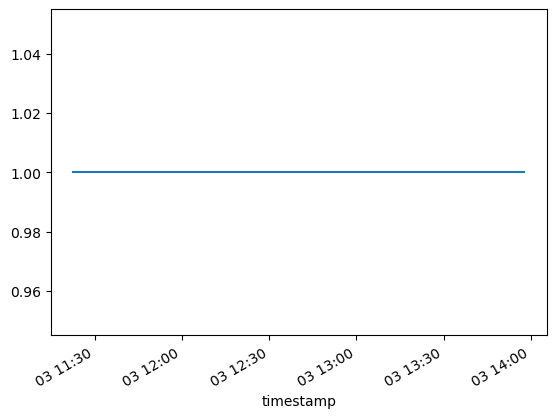

In [6]:
df_lidar["value"][df_lidar["name"] == "weather.classifier.class"].plot(label="lidar")

In [ ]:
df_lidar = sage_data_client.query(
    start="-12h", 
    filter={
        "plugin": "registry.sagecontinuum.org/rjackson/:1.3.5.*",
        "vsn": "W0BE"
    }
)
df_lidar = df_lidar.set_index("timestamp")